# Advanced Experimentation Challenge: What to Use

Using selected questions from the 2012 and 2014 editions of the [European Social Survey](http://www.europeansocialsurvey.org/data/round-index.html), address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the [data file](https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv). And here is the [codebook](https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html), with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
# Import in modules we'll need
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
%matplotlib inline

In [2]:
# Read in our data set and take a quick look
main_df = pd.read_csv('ESSdata_Thinkful.csv')

main_df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Let's begin by creating a dataframe that only has the scores for people's trust with a column for each year. Then we can take this information, put it into a histogram, and see if we think it's normal or not.

In [3]:
# Create an empty dataframe
yrs_trust = pd.DataFrame()

# Create columns for 2014 and 2012 trust rates
yrs_trust['2012'] = main_df.loc[main_df['year'] == 6, :]['ppltrst'].reset_index(drop=True)
yrs_trust['2014'] = main_df.loc[main_df['year'] == 7, :]['ppltrst'].reset_index(drop=True)

# Show what we have so far
yrs_trust.head()

,2012,2014
0,3.0,8.0
1,5.0,4.0
2,8.0,8.0
3,6.0,7.0
4,6.0,4.0


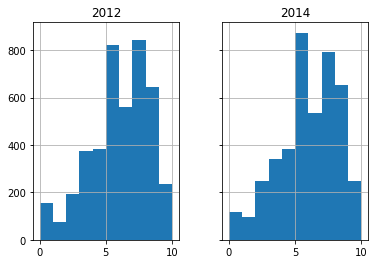

In [4]:
# Make a histogram for each year to visually inspect them
yrs_trust.hist(sharey=True, sharex=True)

plt.show()

This looks like the data could possibly be normal but is also quite skewed, so let's test each year for normality. The null hypothesis in these cases is that the sample comes from a normal distribution.

In [5]:
stats.normaltest(yrs_trust['2012'], nan_policy='omit')

NormaltestResult(statistic=186.89765695754122, pvalue=2.604290647719036e-41)

In [6]:
stats.normaltest(yrs_trust['2014'], nan_policy='omit')

NormaltestResult(statistic=151.69620394925275, pvalue=1.1470645274813038e-33)

Seeing as how both years received a very low p-value (i.e. both are well under 0.05) we can reject the null hypothesis and assume they are not normal. Therefore, we will have to employ non-parametric comparison tests. First we'll deal with any NaN values if we have to.

In [7]:
# Check for empty values
yrs_trust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4297 entries, 0 to 4296
Data columns (total 2 columns):
2012    4287 non-null float64
2014    4293 non-null float64
dtypes: float64(2)
memory usage: 67.2 KB


Seems we have a few but not a lot, so I think it's safe to fill them in with the median of their column.

In [8]:
# Replace NaN values with the median of their respective column
yrs_trust['2012'].fillna(yrs_trust['2012'].median(), inplace=True)
yrs_trust['2014'].fillna(yrs_trust['2014'].median(), inplace=True)

Now that the columns are filled in we can complete a Kruskal-Wallis Test (a non-parametric version of ANOVA). The null hypothesis of this test is that the population median of all of the groups are equal.

In [9]:
# Print the test statistic and p-value for the Kruskal-Wallis Test
stats.kruskal(yrs_trust['2012'], yrs_trust['2014'])

KruskalResult(statistic=0.16034653885979291, pvalue=0.6888376671804128)

Since we received quite a large p-value that is >>> 0.05, we fail to reject the null hypothesis. Therefore, we can conclude that it does not seem that people's level of trust changed between 2012 and 2014.

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Let's start by creating another new dataframe for happiness scores over years.

In [10]:
# Create an empty dataframe
yrs_happy = pd.DataFrame()

# Create columns for 2014 and 2012 trust rates
yrs_happy['2012'] = main_df.loc[main_df['happy'] == 6, :]['ppltrst'].reset_index(drop=True)
yrs_happy['2014'] = main_df.loc[main_df['happy'] == 7, :]['ppltrst'].reset_index(drop=True)

# Show what we have so far
yrs_happy.head()

,2012,2014
0,7.0,8.0
1,8.0,4.0
2,7.0,5.0
3,5.0,3.0
4,0.0,6.0


Then print out a nice histogram to show how the data looks.

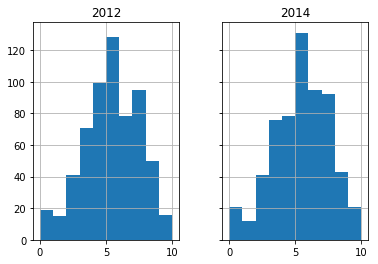

In [11]:
# Make a histogram for each year to visually inspect them
yrs_happy.hist(sharey=True, sharex=True)

plt.show()

This looks more normal than the years scores, but let's do a normal test to be sure.

In [12]:
stats.normaltest(yrs_happy['2012'], nan_policy='omit')

NormaltestResult(statistic=8.025142609717449, pvalue=0.018086828643633816)

In [13]:
stats.normaltest(yrs_happy['2012'], nan_policy='omit')

NormaltestResult(statistic=8.025142609717449, pvalue=0.018086828643633816)

Both years received values well above our usual 0.05 margin for p-values, so we can conclude that these subsets of the data are likely distributed normally. Therefore, we can go ahead with our usual parametric testing. First though let's make sure we fill in any empty values for the years.

In [14]:
# Check for empty values
yrs_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 2 columns):
2012    612 non-null float64
2014    610 non-null float64
dtypes: float64(2)
memory usage: 9.6 KB


Seems we have 2 missing values from 2014, so let's give them the mean of the year.

In [15]:
# Replace NaN values with the mean of their respective column
yrs_happy['2014'].fillna(yrs_happy['2014'].mean(), inplace=True)

Now we can perform our t-test on the two columns. The null hypothesis of this test is that the two independent samples have identical average values.

In [16]:
stats.ttest_ind(yrs_happy['2012'], yrs_happy['2014'])

Ttest_indResult(statistic=-0.3404206646450707, pvalue=0.7335982690492208)

Since we received such a large p-value, we fail to reject the null hypothesis. Therefore, we can state that it is unlikely that people are more happy in 2014 than in 2012.

### 3. Who reported watching more TV in 2012, men or women?

For this one we'll take out just the information from 2012, split it between men and women's tv totals, and analyze from there.

In [17]:
# Make a copy of the dataframe that only contains information from 2012
main_2012 = main_df[main_df['year'] == 6].copy()

In [18]:
# Take out the TV total information for men and women into a new dataframe
mf_2012tv = pd.DataFrame()

mf_2012tv['male'] = main_2012[main_2012['gndr'] == 1]['tvtot'].reset_index(drop=True)
mf_2012tv['female'] = main_2012[main_2012['gndr'] == 2]['tvtot'].reset_index(drop=True)

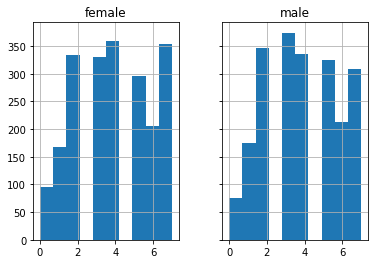

In [19]:
# Make a histogram for each year to visually inspect them
mf_2012tv.hist(sharey=True, sharex=True)

plt.show()

These don't look very normal to me, but let's be sure with a normal test.

In [20]:
stats.normaltest(mf_2012tv['male'], nan_policy='omit')

NormaltestResult(statistic=407.6545412430977, pvalue=3.0125974743415432e-89)

In [21]:
stats.normaltest(mf_2012tv['female'], nan_policy='omit')

NormaltestResult(statistic=473.95970583307366, pvalue=1.2049181771413786e-103)

As suspected, the p-values are very low, and we can therefore reject the null hypothesis that these are normal. Thus we can continue with non-parametric testing once more.

In [22]:
mf_2012tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154 entries, 0 to 2153
Data columns (total 2 columns):
male      2151 non-null float64
female    2140 non-null float64
dtypes: float64(2)
memory usage: 33.7 KB


Looks like both columns have some missing values, so we'll fill those in with medians here.

In [23]:
mf_2012tv['male'].fillna(mf_2012tv['male'].median(), inplace=True)
mf_2012tv['female'].fillna(mf_2012tv['female'].median(), inplace=True)

In [24]:
# Print the test statistic and p-value for the Kruskal-Wallis Test
stats.kruskal(mf_2012tv['male'], mf_2012tv['female'])

KruskalResult(statistic=0.5981706561585179, pvalue=0.43927685606865285)

Since this p-value is well above the 0.05 margin, we fail to reject the null hypothesis. This means we can assume that the median of the sex groups are equal when it comes to television.

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Since we already have a dataframe that's just the 2012 data, we can now take our the fairness scores from this year and split it by whether or not they are living with a partner quite easily. Let's proceed as we have done before.

In [25]:
# Take out the fairness scores for people living with or without partners into a new dataframe
fbp_df = pd.DataFrame()

fbp_df['partner'] = main_2012[main_2012['partner'] == 1]['pplfair'].reset_index(drop=True)
fbp_df['no partner'] = main_2012[main_2012['partner'] == 2]['pplfair'].reset_index(drop=True)

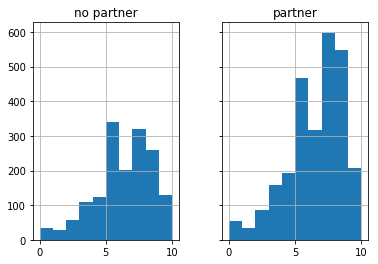

In [26]:
# Make a histogram
fbp_df.hist(sharey=True, sharex=True)

plt.show()

These don't quite look normal, but let's perform normal tests to be sure.

In [27]:
stats.normaltest(fbp_df['partner'], nan_policy='omit')

NormaltestResult(statistic=179.1040099384887, pvalue=1.2825030260118435e-39)

In [28]:
stats.normaltest(fbp_df['no partner'], nan_policy='omit')

NormaltestResult(statistic=64.92830332216809, pvalue=7.961558194894824e-15)

As both of the p-values are well below our 0.05 margin we can reject the null hypothesis, and claim that these two sets of data are most likely not from a normal distribution. Let's then check for missing values, fill in as necessary, and perform our non-parametric testing.

In [29]:
fbp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2674 entries, 0 to 2673
Data columns (total 2 columns):
partner       2663 non-null float64
no partner    1608 non-null float64
dtypes: float64(2)
memory usage: 41.9 KB


There are quite a few missing entries for the "no partner" data, so it would be misleading if we filled these values in. Therefore, we can have our Kruskal-Wallis test omit them on its own.

In [30]:
# Print the test statistic and p-value for the Kruskal-Wallis Test
stats.kruskal(fbp_df['partner'], fbp_df['no partner'], nan_policy='omit')

KruskalResult(statistic=13.739649374653519, pvalue=0.00020997468964373384)

The null hypothesis of a Kruskal-Wallis test is that the population median of all the groups is equal, and we received a p-value well below the 0.05 confidence level. Therefore we can conclude that in 2012, it seems highly likely that people living with a partner had a difference in opinion from those who did not live with a partner. However, who had the higher fairness score? Let's take a look at the medians to decide that.

In [31]:
print("People living with a partner had a median fairness score of:", fbp_df['partner'].median())
print("People living alone had a median fairness score of:", fbp_df['no partner'].median())

People living with a partner had a median fairness score of: 7.0
People living alone had a median fairness score of: 6.0


Since the people living with a partner has a higher median, and we have shown the medians between the groups to be statistically different from each other, we can conclude that those living with their partner were more likely to believe people were fair in 2012.

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Let's see which three countries have the largest samples to pick from and take our data from them. First let's filter it to just 2014 cases.

In [32]:
# Make a copy of the dataframe that only contains information from 2012
main_2014 = main_df[main_df['year'] == 7].copy()

In [33]:
main_2014['cntry'].value_counts()

ES    1213
SE     908
CH     773
NO     731
CZ     658
DE      14
Name: cntry, dtype: int64

Looks like we'll be taking Spain, Sweden, and China's data.

In [34]:
# Make list of three top countries
cntry_list = ['ES', 'SE', 'CH']

# Make subset of countries in our list in a new dataframe
so_cntry_2014 = pd.DataFrame()

so_cntry_2014 = main_2014[main_2014['cntry'].isin(cntry_list)].reset_index(drop=True)

In [35]:
# Then take out just the social meeting numbers for each country into their own columns
cntry_soc = pd.DataFrame()

cntry_soc['spain'] = so_cntry_2014[so_cntry_2014['cntry'] == 'ES']['sclmeet'].reset_index(drop=True)
cntry_soc['sweden'] = so_cntry_2014[so_cntry_2014['cntry'] == 'SE']['sclmeet'].reset_index(drop=True)
cntry_soc['china']  = so_cntry_2014[so_cntry_2014['cntry'] == 'CH']['sclmeet'].reset_index(drop=True)

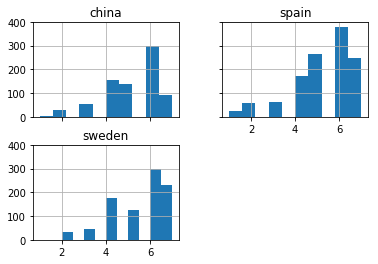

In [36]:
# Make a histogram
cntry_soc.hist(sharey=True, sharex=True)

plt.show()

These definitely don't seem normal to me, at this point I think it's safe to skip the normal test. Let's see if we have to deal with any missing values.

In [37]:
cntry_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
spain     1211 non-null float64
sweden    908 non-null float64
china     772 non-null float64
dtypes: float64(3)
memory usage: 28.5 KB


Probably best we don't try to influence the statistics with this one and just have the Kruskal test omit NaN values for now.

In [38]:
# Print the test statistic and p-value for the Kruskal-Wallis Test
stats.kruskal(cntry_soc['spain'], cntry_soc['sweden'], cntry_soc['china'], nan_policy='omit')

KruskalResult(statistic=20.974963481937596, pvalue=2.7883324361335602e-05)

Since we got such a low p-value, we can say that the null hypothesis is rejected and that the medians of these countries is statistically different. Let us then check out the scores.

In [39]:
# Print out the median for each country
for cntry in cntry_soc.columns:
    print("The median value for {} is {}.".format(cntry, cntry_soc[cntry].median()))

The median value for spain is 6.0.
The median value for sweden is 6.0.
The median value for china is 6.0.


Well all the medians are the exact same, so looking at that isn't very telling. Let's look at the percentages instead to get a better idea of what's going on.

In [40]:
# For each country, print out the percentage of people who gave 5, 6, and 7 scores
for cntry in cntry_soc.columns:
    for score in [5, 6, 7]:    
        
        perc_cntry = cntry_soc[cntry].value_counts().loc[score] / cntry_soc[cntry].value_counts().sum()
        
        print("The percentage of citizens from {} that gave a score of {} is {}".format(
                                                                                        cntry,
                                                                                        score,
                                                                                        perc_cntry)
                                                                                        )
    print("\n")

The percentage of citizens from spain that gave a score of 5 is 0.21882741535920727
The percentage of citizens from spain that gave a score of 6 is 0.3129644921552436
The percentage of citizens from spain that gave a score of 7 is 0.20644095788604458


The percentage of citizens from sweden that gave a score of 5 is 0.13766519823788545
The percentage of citizens from sweden that gave a score of 6 is 0.32819383259911894
The percentage of citizens from sweden that gave a score of 7 is 0.2522026431718062


The percentage of citizens from china that gave a score of 5 is 0.18134715025906736
The percentage of citizens from china that gave a score of 6 is 0.3860103626943005
The percentage of citizens from china that gave a score of 7 is 0.12046632124352331




Looks like Sweden got the largest percentage of scores of seven when it comes to socializing, while also holding the second highest spot for giving scores of six in this social category. Surprisingly China has quite a low percentage of scores of 7, but still does the best in the 6 range. If I had to choose the most social country just from looking at these stats however, I would imagine it is Sweden.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which Countries stand out?

Since we already have a dataframe with just the 2014 information, we can easily take what we need from that to move forward. Let's stick with the three countries we used in the last example as well.

In [41]:
# Then take out just the social social activities with same age numbers for each country into their own columns
age_soc = pd.DataFrame()

age_soc['spain'] = so_cntry_2014[so_cntry_2014['cntry'] == 'ES']['sclact'].reset_index(drop=True)
age_soc['sweden'] = so_cntry_2014[so_cntry_2014['cntry'] == 'SE']['sclact'].reset_index(drop=True)
age_soc['china']  = so_cntry_2014[so_cntry_2014['cntry'] == 'CH']['sclact'].reset_index(drop=True)

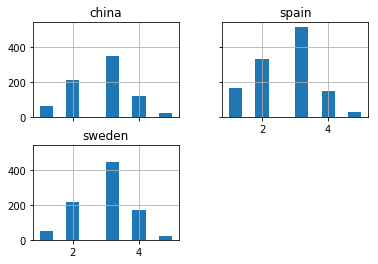

In [42]:
# Make a histogram
age_soc.hist(sharey=True, sharex=True)

plt.show()

This looks somewhat normal, so let's do some tests to be sure one way or another.

In [43]:
stats.normaltest(age_soc['spain'], nan_policy='omit')

NormaltestResult(statistic=5.3565262760313574, pvalue=0.06868234236702869)

In [44]:
stats.normaltest(age_soc['sweden'], nan_policy='omit')

NormaltestResult(statistic=0.9537534293814426, pvalue=0.6207190501164626)

In [45]:
stats.normaltest(age_soc['china'], nan_policy='omit')

NormaltestResult(statistic=0.6684268007635803, pvalue=0.7159009923799846)

Looks like none of them managed to pass the test of normality, although Spain got close. Regardless, we'll continue with non-parametric testing.

In [46]:
age_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 3 columns):
spain     1185 non-null float64
sweden    904 non-null float64
china     765 non-null float64
dtypes: float64(3)
memory usage: 28.5 KB


Again, because we have many missing values for different countries, we can just tell the Kruskal test to omit NaNs.

In [47]:
# Print the test statistic and p-value for the Kruskal-Wallis Test
stats.kruskal(age_soc['spain'], age_soc['sweden'], age_soc['china'], nan_policy='omit')

KruskalResult(statistic=42.35627547270334, pvalue=6.345292463160473e-10)

Interestingly enough, the p-value is very small and we can therefore reject the null hypothesis and say that it is very likely that these countries see different levels of social activity within the same age groups.

In [48]:
# For each country, print out the percentage of people who gave 5, 6, and 7 scores
for cntry in age_soc.columns:
    for score in [4, 5]:    
        
        perc_cntry = age_soc[cntry].value_counts().loc[score] / cntry_soc[cntry].value_counts().sum()
        
        print("The percentage of citizens from {} that gave a score of {} is {}".format(
                                                                                        cntry,
                                                                                        score,
                                                                                        perc_cntry)
                                                                                        )
    print("\n")

The percentage of citizens from spain that gave a score of 4 is 0.12138728323699421
The percentage of citizens from spain that gave a score of 5 is 0.023947151114781174


The percentage of citizens from sweden that gave a score of 4 is 0.18612334801762115
The percentage of citizens from sweden that gave a score of 5 is 0.024229074889867842


The percentage of citizens from china that gave a score of 4 is 0.15544041450777202
The percentage of citizens from china that gave a score of 5 is 0.031088082901554404




The scores of taking part in social activity compared to others of the same age range from 1 - 5 with 5 being "much more than most" so I only looked at scores of 4 and 5 to quickly compare between countries. It looks like China has the highest percentage of scores of 5 and the second highest percentage of scores of 4, so I would wager that it has the highest amount of this sort of activity of the countries in this subset.